In [20]:
 #This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'cae5a8a2-9fac-43c1-a3b7-dcb67aa4946f',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2024-09-07T07:59:43.142Z', 'error_code': 0, 'error_message': None, 'elapsed': 34, 'credit_count': 1, 'notice': None, 'total_count': 9897}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11672, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [22]:
type(data)

dict

In [24]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [26]:
#This normalizes the data and makes it all pretty in a dataframe
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11672,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",f,f,f,False,NaN,1,NaN,NaN,None,2024-09-07T07:59:00.000Z,f,f,f,f,f,f,f,f,f,f,f,f,None,2024-09-07T07:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-07 14:59:54.288879
1,1027,Ethereum,ETH,ethereum,9264,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,f,f,True,NaN,2,NaN,NaN,None,2024-09-07T07:58:00.000Z,f,f,f,f,f,f,f,f,f,f,f,f,None,2024-09-07T07:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-07 14:59:54.288879
2,825,Tether USDt,USDT,tether,96559,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,f,f,True,NaN,3,NaN,NaN,None,2024-09-07T07:58:00.000Z,f,f,f,f,f,f,f,f,f,f,f,f,None,2024-09-07T07:58:00.000Z,f,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-07 14:59:54.288879
3,1839,BNB,BNB,bnb,2222,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,f,f,False,NaN,4,NaN,NaN,None,2024-09-07T07:58:00.000Z,f,f,f,f,f,f,f,f,f,f,f,f,None,2024-09-07T07:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-07 14:59:54.288879
4,5426,Solana,SOL,solana,725,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,f,f,True,NaN,5,NaN,NaN,None,2024-09-07T07:58:00.000Z,f,f,f,f,f,f,f,f,f,f,f,f,None,2024-09-07T07:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-07 14:59:54.288879
5,3408,USDC,USDC,usd-coin,21868,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,f,f,False,NaN,6,NaN,NaN,None,2024-09-07T07:58:00.000Z,f,f,f,f,f,f,f,f,f,f,f,f,None,2024-09-07T07:58:00.000Z,f,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-07 14:59:54.288879
6,52,XRP,XRP,xrp,1374,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",f,f,f,False,NaN,7,NaN,NaN,None,2024-09-07T07:59:00.000Z,f,f,f,f,f,f,f,f,f,f,f,f,None,2024-09-07T07:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-07 14:59:54.288879
7,74,Dogecoin,DOGE,dogecoin,1053,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,f,f,True,NaN,8,NaN,NaN,None,2024-09-07T07:59:00.000Z,f,f,f,f,f,f,f,f,f,f,f,f,None,2024-09-07T07:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-07 14:59:54.288879
8,1958,TRON,TRX,tron,1022,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,f,f,True,NaN,9,f,f,None,2024-09-07T07:58:00.000Z,f,f,f,f,f,f,f,f,f,f,f,f,None,2024-09-07T07:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-07 14:59:54.288879
9,11419,Toncoin,TON,toncoin,546,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,f,f,True,NaN,10,f,f,None,2024-09-07T07:58:00.000Z,f,f,f,f,f,f,f,f,f,f,f,f,None,2024-09-07T07:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-07 14:59:54.288879


In [28]:
def api_runner():
    global df
     #This example uses Python 2.7 and the python-request library.   
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'cae5a8a2-9fac-43c1-a3b7-dcb67aa4946f',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])
    df_append = pd.DataFrame(df2)
    df = pd.concat([df, df_append])

    if not os.path.isfile(r'C:\Users\josep\Downloads\API.csv'):
        df.to_csv(r'C:\Users\josep\Downloads\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\josep\Downloads\API.csv', mode='a', header=False)

In [36]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner Completed')
    sleep(60) #sleep for 1 minute
exit()

{'status': {'timestamp': '2024-09-07T08:01:34.581Z', 'error_code': 0, 'error_message': None, 'elapsed': 858, 'credit_count': 1, 'notice': None, 'total_count': 9897}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11672, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

KeyboardInterrupt: 

In [44]:
pd.options.display.float_format = '{:,.2f}'.format

In [46]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11672,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...","21,000,000.00","19,750,787.00","19,750,787.00",False,NaN,1,NaN,NaN,None,2024-09-07T07:59:00.000Z,"54,266.19","47,137,716,894.64",48.53,-0.04,-2.73,-8.18,-5.15,-4.88,-21.68,"1,071,799,931,680.14",55.78,"1,139,589,959,897.95",None,2024-09-07T07:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-07 14:59:54.288879
1,1027,Ethereum,ETH,ethereum,9264,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,"120,319,073.01","120,319,073.01",True,NaN,2,NaN,NaN,None,2024-09-07T07:58:00.000Z,"2,288.06","25,595,130,467.55",82.91,0.51,-2.45,-9.25,-5.28,-25.24,-37.92,"275,297,344,192.41",14.33,"275,297,344,192.41",None,2024-09-07T07:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-07 14:59:54.288879
2,825,Tether USDt,USDT,tether,96559,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,"118,191,486,570.89","120,240,893,175.74",True,NaN,3,NaN,NaN,None,2024-09-07T07:58:00.000Z,1.00,"74,076,822,877.28",54.76,-0.04,0.01,-0.02,-0.13,-0.02,-0.00,"118,173,120,834.46",6.15,"120,222,208,982.68",None,2024-09-07T07:58:00.000Z,"1,027.00",Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-07 14:59:54.288879
3,1839,BNB,BNB,bnb,2222,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,"145,934,553.05","145,934,553.05",False,NaN,4,NaN,NaN,None,2024-09-07T07:58:00.000Z,494.80,"1,861,290,049.05",26.43,0.42,-1.41,-7.68,1.81,-3.45,-27.20,"72,208,189,673.12",3.76,"72,208,189,673.12",None,2024-09-07T07:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-07 14:59:54.288879
4,5426,Solana,SOL,solana,725,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,"467,527,170.52","583,982,805.13",True,NaN,5,NaN,NaN,None,2024-09-07T07:58:00.000Z,127.68,"3,548,779,126.61",84.13,0.31,-0.62,-7.26,-16.97,-10.21,-19.72,"59,692,103,838.25",3.11,"74,560,719,550.85",None,2024-09-07T07:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-07 14:59:54.288879
5,3408,USDC,USDC,usd-coin,21868,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,"34,854,697,605.45","34,854,697,605.45",False,NaN,6,NaN,NaN,None,2024-09-07T07:58:00.000Z,1.00,"9,461,769,641.73",56.49,-0.04,0.01,0.00,-0.07,0.00,0.00,"34,855,998,024.19",1.81,"34,855,998,024.19",None,2024-09-07T07:58:00.000Z,"1,027.00",Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-07 14:59:54.288879
6,52,XRP,XRP,xrp,1374,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...","100,000,000,000.00","56,329,375,591.00","99,987,271,820.00",False,NaN,7,NaN,NaN,None,2024-09-07T07:59:00.000Z,0.53,"1,379,243,094.36",43.29,0.20,-1.09,-6.56,-12.64,21.68,7.25,"29,840,818,422.96",1.55,"52,975,588,864.38",None,2024-09-07T07:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-07 14:59:54.288879
7,74,Dogecoin,DOGE,dogecoin,1053,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,"145,854,586,383.71","145,854,586,383.71",True,NaN,8,NaN,NaN,None,2024-09-07T07:59:00.000Z,0.09,"813,251,141.85",74.65,0.79,-3.72,-7.17,-5.45,-13.04,-35.57,"13,699,292,029.71",0.71,"13,699,292,029.71",None,2024-09-07T07:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-07 14:59:54.288879
8,1958,TRON,TRX,tron,1022,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosyste

In [48]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.04,-2.72,-8.17,-5.14,-4.89,-21.68
Ethereum,0.51,-2.43,-9.25,-5.27,-25.24,-37.92
Tether USDt,-0.03,0.01,-0.01,-0.11,-0.01,-0.00
BNB,0.43,-1.40,-7.67,1.83,-3.43,-27.20
Solana,0.31,-0.60,-7.26,-16.97,-10.19,-19.72
USDC,-0.03,0.01,0.00,-0.05,0.01,0.01
XRP,0.21,-1.07,-6.54,-12.63,21.74,7.26
Dogecoin,0.80,-3.67,-7.14,-5.41,-13.00,-35.55
TRON,-0.06,0.18,-5.17,19.00,16.40,30.09


In [50]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.04
             quote.USD.percent_change_24h    -2.72
             quote.USD.percent_change_7d     -8.17
             quote.USD.percent_change_30d    -5.14
             quote.USD.percent_change_60d    -4.89
             quote.USD.percent_change_90d   -21.68
Ethereum     quote.USD.percent_change_1h      0.51
             quote.USD.percent_change_24h    -2.43
             quote.USD.percent_change_7d     -9.25
             quote.USD.percent_change_30d    -5.27
             quote.USD.percent_change_60d   -25.24
             quote.USD.percent_change_90d   -37.92
Tether USDt  quote.USD.percent_change_1h     -0.03
             quote.USD.percent_change_24h     0.01
             quote.USD.percent_change_7d     -0.01
             quote.USD.percent_change_30d    -0.11
             quote.USD.percent_change_60d    -0.01
             quote.USD.percent_change_90d    -0.00
BNB          quote.USD.percent_change_1h

In [54]:
df5 = df4.to_frame(name='values')
df5

values
name                                            
Bitcoin     quote.USD.percent_change_1h    -0.04
            quote.USD.percent_change_24h   -2.72
            quote.USD.percent_change_7d    -8.17
            quote.USD.percent_change_30d   -5.14
            quote.USD.percent_change_60d   -4.89
            quote.USD.percent_change_90d  -21.68
Ethereum    quote.USD.percent_change_1h     0.51
            quote.USD.percent_change_24h   -2.43
            quote.USD.percent_change_7d    -9.25
            quote.USD.percent_change_30d   -5.27
            quote.USD.percent_change_60d  -25.24
            quote.USD.percent_change_90d  -37.92
Tether USDt quote.USD.percent_change_1h    -0.03
            quote.USD.percent_change_24h    0.01
            quote.USD.percent_change_7d    -0.01
            quote.USD.percent_change_30d   -0.11
            quote.USD.percent_change_60d   -0.01
            quote.USD.percent_change_90d   -0.00
BNB         quote.USD.percent_change_1h     0.43
            quote.USD.percent_change_24h   -1.40
            quote.USD.percent_change_7d    -7.67
            quote.USD.percent_change_30d    1.83
            quote.USD.percent_change_60d   -3.43
            quote.USD.percent_change_90d  -27.20
Solana      quote.USD.percent_change_1h     0.31
            quote.USD.percent_change_24h   -0.60
            quote.USD.percent_change_7d    -7.26
            quote.USD.percent_change_30d  -16.97
            quote.USD.percent_change_60d  -10.19
            quote.USD.percent_change_90d  -19.72
USDC        quote.USD.percent_change_1h    -0.03
            quote.USD.percent_change_24h    0.01
            quote.USD.percent_change_7d     0.00
            quote.USD.percent_change_30d   -0.05
            quote.USD.percent_change_60d    0.01
            quote.USD.percent_change_90d    0.01
XRP         quote.USD.percent_change_1h     0.21
            quote.USD.percent_change_24h   -1.07
            quote.USD.percent_change_7d    -6.54
            quote.USD.percent_change_30d  -12.63
            quote.USD.percent_change_60d   21.74
            quote.USD.percent_change_90d    7.26
Dogecoin    quote.USD.percent_change_1h     0.80
            quote.USD.percent_change_24h   -3.67
            quote.USD.percent_change_7d    -7.14
            quote.USD.percent_change_30d   -5.41
            quote.USD.percent_change_60d  -13.00
            quote.USD.percent_change_90d  -35.55
TRON        quote.USD.percent_change_1h    -0.06
            quote.USD.percent_change_24h    0.18
            quote.USD.percent_change_7d    -5.17
            quote.USD.percent_change_30d   19.00
            quote.USD.percent_change_60d   16.40
            quote.USD.percent_change_90d   30.09
Toncoin     quote.USD.percent_change_1h    -0.42
            quote.USD.percent_change_24h   -3.23
            quote.USD.percent_change_7d   -13.24
            quote.USD.percent_change_30d  -26.22
            quote.USD.percent_change_60d  -36.40
            quote.USD.percent_change_90d  -34.67
Cardano     quote.USD.percent_change_1h     0.12
            quote.USD.percent_change_24h    0.89
            quote.USD.percent_change_7d    -7.09
            quote.USD.percent_change_30d   -3.43
            quote.USD.percent_change_60d  -12.86
            quote.USD.percent_change_90d  -26.05
Avalanche   quote.USD.percent_change_1h     0.72
            quote.USD.percent_change_24h    0.44
            quote.USD.percent_change_7d    -5.94
            quote.USD.percent_change_30d    5.10
            quote.USD.percent_change_60d  -15.52
            quote.USD.percent_change_90d  -33.25
Shiba Inu   quote.USD.percent_change_1h     0.16
            quote.USD.percent_change_24h   -1.91
            quote.USD.percent_change_7d    -6.96
            quote.USD.percent_change_30d   -2.58
            quote.USD.percent_change_60d  -21.01
            quote.USD.percent_change_90d  -44.11
Chainlink   quote.USD.percent_change_1h     1.02
            quote.USD.percent_change_24h   -0.04
            quote.USD.pe

In [60]:
Index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.04
1,Bitcoin,quote.USD.percent_change_24h,-2.72
2,Bitcoin,quote.USD.percent_change_7d,-8.17
3,Bitcoin,quote.USD.percent_change_30d,-5.14
4,Bitcoin,quote.USD.percent_change_60d,-4.89
5,Bitcoin,quote.USD.percent_change_90d,-21.68
6,Ethereum,quote.USD.percent_change_1h,0.51
7,Ethereum,quote.USD.percent_change_24h,-2.43
8,Ethereum,quote.USD.percent_change_7d,-9.25
9,Ethereum,quote.USD.percent_change_30d,-5.27


In [72]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.04
1,Bitcoin,quote.USD.percent_change_24h,-2.72
2,Bitcoin,quote.USD.percent_change_7d,-8.17
3,Bitcoin,quote.USD.percent_change_30d,-5.14
4,Bitcoin,quote.USD.percent_change_60d,-4.89
5,Bitcoin,quote.USD.percent_change_90d,-21.68
6,Ethereum,quote.USD.percent_change_1h,0.51
7,Ethereum,quote.USD.percent_change_24h,-2.43
8,Ethereum,quote.USD.percent_change_7d,-9.25
9,Ethereum,quote.USD.percent_change_30d,-5.27


In [78]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])

In [80]:
df7

,name,percent_change,values
0,Bitcoin,1h,-0.04
1,Bitcoin,24h,-2.72
2,Bitcoin,7d,-8.17
3,Bitcoin,30d,-5.14
4,Bitcoin,60d,-4.89
5,Bitcoin,90d,-21.68
6,Ethereum,1h,0.51
7,Ethereum,24h,-2.43
8,Ethereum,7d,-9.25
9,Ethereum,30d,-5.27


In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

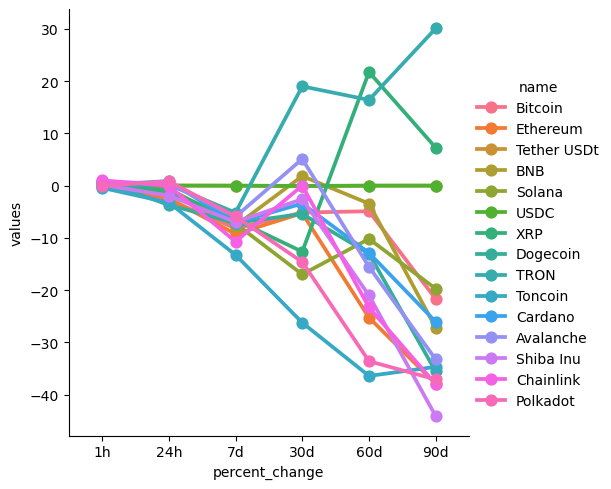

In [86]:
sns.catplot(x='percent_change', y ='values', hue='name', data=df7, kind='point')

In [102]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df7[['name','values']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,values
0,Bitcoin,-0.04
1,Bitcoin,-2.72
2,Bitcoin,-8.17
3,Bitcoin,-5.14
4,Bitcoin,-4.89
5,Bitcoin,-21.68


<Axes: xlabel='name', ylabel='values'>

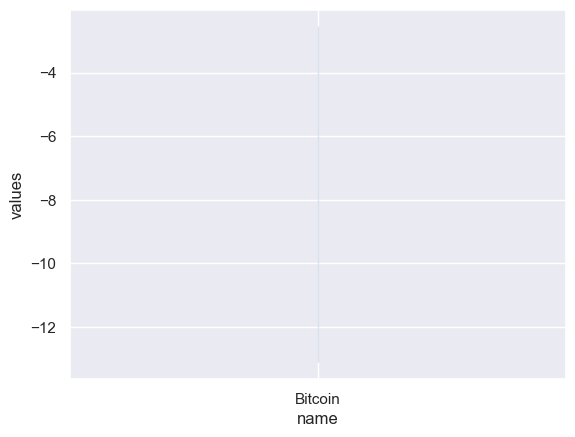

In [106]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='name', y='values', data = df10)